<a href="https://colab.research.google.com/github/IsokGta7/IsokGta7.github.io/blob/main/Notebooks/04-Frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>El papel de la frecuencia en el NLP y tareas relacionadas</h1>

En esta notebook exploraremos las leyes de Zipf y Benford. Experimentaremos con varios textos y datasets para ver si cumplen dichas leyes.

#1. La ley de Zipf

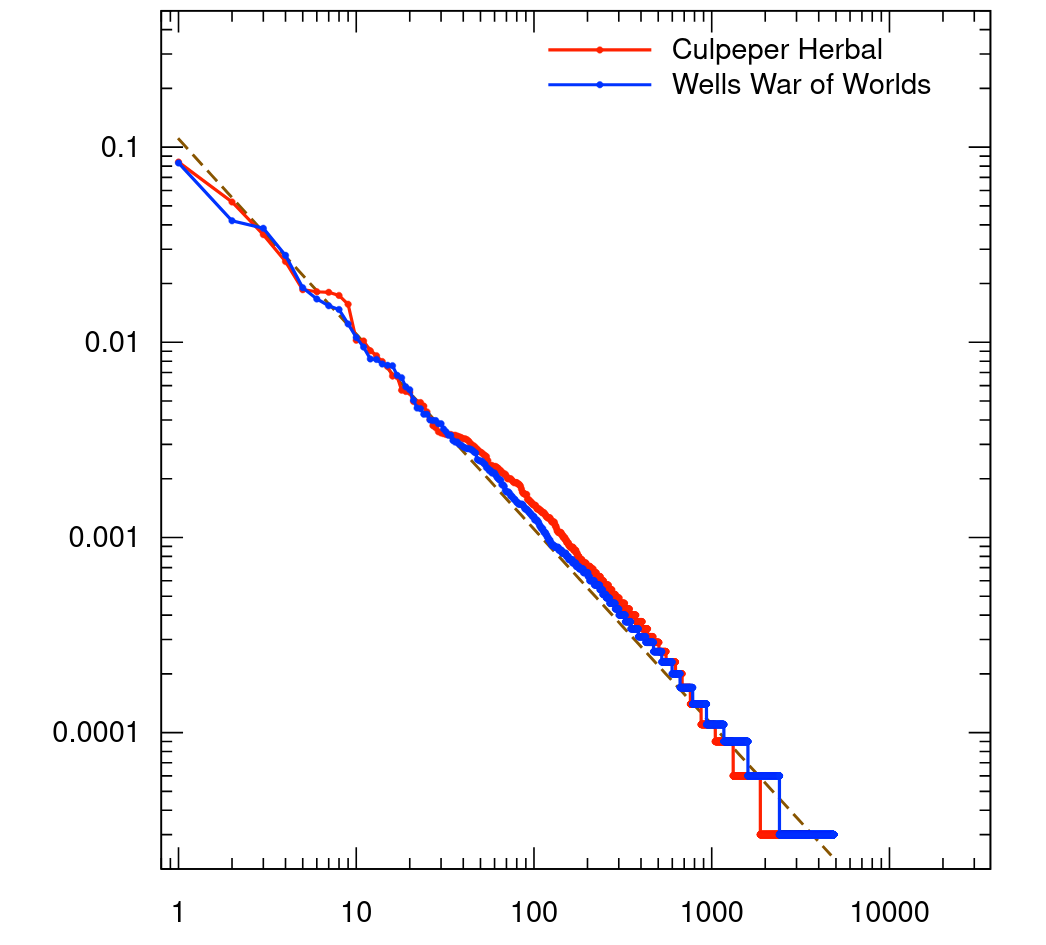

<h3>⭕ Instrucciones</h3>

1. Baja el dataset Gutenberg


In [19]:
!gdown 1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N

Downloading...
From (original): https://drive.google.com/uc?id=1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N
From (redirected): https://drive.google.com/uc?id=1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N&confirm=t&uuid=6469fe76-0ad7-4cef-9a09-e24c6e09df5e
To: /content/gutenberg_data_1000.csv
100% 468M/468M [00:03<00:00, 146MB/s] 


2. Escoge un documento aleatorio

In [20]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('/content/gutenberg_data_1000.csv',index_col=0)

idx = np.random.choice(data_df.index.to_list(),size=1)[0]
text = data_df.loc[idx,'Text']

print(f"Índice: {idx},\n\t{text[:150]}")

Índice: 327,
	Japanese Fairy Tales COMPILED BY by Yei Theodora Ozaki Profusely Illustrated by Japanese Artists Contents PREFACE JAPANESE FAIRY TALES MY LORD BAG OF 


3. Haz un breve análisis exploratorio del texto.

In [21]:
#Analizamos el dataset primero

print(data_df.head())
print(data_df.info())


                                          Title  \
0       The Extermination of the American Bison   
1                          Deadfalls and Snares   
2                   Artistic Anatomy of Animals   
3                            Birds, Illustrated   
4  On Snake-Poison: Its Action and Its Antidote   

                                     Author Bookshelf  \
0                       William T. Hornaday    Animal   
1                             A. R. Harding    Animal   
2                             Édouard Cuyer    Animal   
3  Color Photography, Vol. 1, No. 1 Various    Animal   
4                                A. Mueller    Animal   

                                                Text  
0  [Illustration: (Inscription) Mr. Theodore Roos...  
1  DEADFALLS AND SNARES [Frontispiece: A GOOD DEA...  
2  +---------------------------------------------...  
3  FROM: THE PRESIDENT OF THE NATIONAL TEACHERS' ...  
4  [Illustration] ON SNAKE-POISON. ITS ACTION AND...  
<class 'pandas.core.

In [22]:
import string

# Ahora el texto
num_chars = len(text)
num_words = len(text.split())

print(f"Número de caracteres: {num_chars}")
print(f"Número de palabras: {num_words}")

special_chars = sum(1 for char in text if char in string.punctuation)
print(f"Número de caracteres de puntuación: {special_chars}")

print(f"Porcentaje de puntuación: {100 * special_chars / num_chars:.2f}%")


Número de caracteres: 370317
Número de palabras: 70622
Número de caracteres de puntuación: 8138
Porcentaje de puntuación: 2.20%


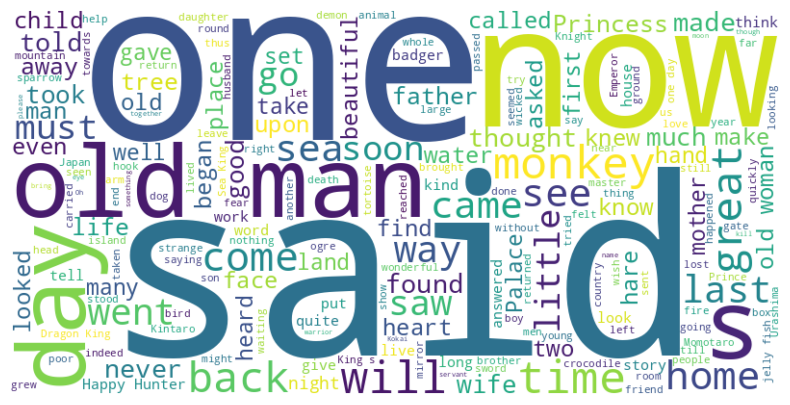

In [23]:
# Podemos tambien ver el texto en una nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


3. Quita solamente signos de puntuación y tokeniza. **No quites stopwords** ni realices preprocesamiento adicional.

In [24]:
import re

# quitamos simbolos de puntuacion
def limpiado(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    text = text.replace('\n', ' ')
    return text

textolimpio = limpiado(text)
print(textolimpio)


japanese fairy tales compiled by by yei theodora ozaki profusely illustrated by japanese artists contents preface japanese fairy tales my lord bag of rice the tonguecut sparrow the story of urashima taro the fisher lad the farmer and the badger the shinansha or the south pointing carriage the adventures of kintaro the golden boy the story of princess hase a story of old japan the story of the man who did not wish to die the bamboocutter and the moonchild the mirror of matsuyama a story of old japan the goblin of adachigahara the sagacious monkey and the boar the happy hunter and the skillful fisher the story of the old man who made withered trees to flower the jelly fish and the monkey the quarrel of the monkey and the crab the white hare and the crocodiles the story of prince yamato take momotaro or the story of the son of a peach the ogre of rashomon how an old man lost his wen the stones of five colors and the empress jokwa an old chinese story to eleanor marioncrawford i dedicate t

In [25]:
import spacy
# tokenizamos el texto limpio con spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(textolimpio)
tokens = [token.text for token in doc]
print(tokens)

['japanese', 'fairy', 'tales', 'compiled', 'by', 'by', 'yei', 'theodora', 'ozaki', 'profusely', 'illustrated', 'by', 'japanese', 'artists', 'contents', 'preface', 'japanese', 'fairy', 'tales', 'my', 'lord', 'bag', 'of', 'rice', 'the', 'tonguecut', 'sparrow', 'the', 'story', 'of', 'urashima', 'taro', 'the', 'fisher', 'lad', 'the', 'farmer', 'and', 'the', 'badger', 'the', 'shinansha', 'or', 'the', 'south', 'pointing', 'carriage', 'the', 'adventures', 'of', 'kintaro', 'the', 'golden', 'boy', 'the', 'story', 'of', 'princess', 'hase', 'a', 'story', 'of', 'old', 'japan', 'the', 'story', 'of', 'the', 'man', 'who', 'did', 'not', 'wish', 'to', 'die', 'the', 'bamboocutter', 'and', 'the', 'moonchild', 'the', 'mirror', 'of', 'matsuyama', 'a', 'story', 'of', 'old', 'japan', 'the', 'goblin', 'of', 'adachigahara', 'the', 'sagacious', 'monkey', 'and', 'the', 'boar', 'the', 'happy', 'hunter', 'and', 'the', 'skillful', 'fisher', 'the', 'story', 'of', 'the', 'old', 'man', 'who', 'made', 'withered', 'tree

4. Haz un conteo de las palabras (tokens) más frecuentes y obten los 15 más frecuentes. Imprimelos, junto con sus frecuencias.<br>
 *Una opción es usar la clase [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) del módulo `collections`.*

In [26]:
from collections import Counter

word_counter = Counter(tokens)
word_counter.most_common(10)

[('the', 5315),
 ('and', 2852),
 ('to', 2423),
 ('of', 1775),
 ('he', 1544),
 ('his', 1134),
 ('a', 1100),
 ('was', 1081),
 ('in', 1017),
 ('that', 830)]

5. Usando matplotlib, haz un gráfico de barras mostrando la frecuencia de cada una de las 15 palabras (tokens) más frecuentes, de mayor a menor. Toma como referencia el ejemplo a continuación.

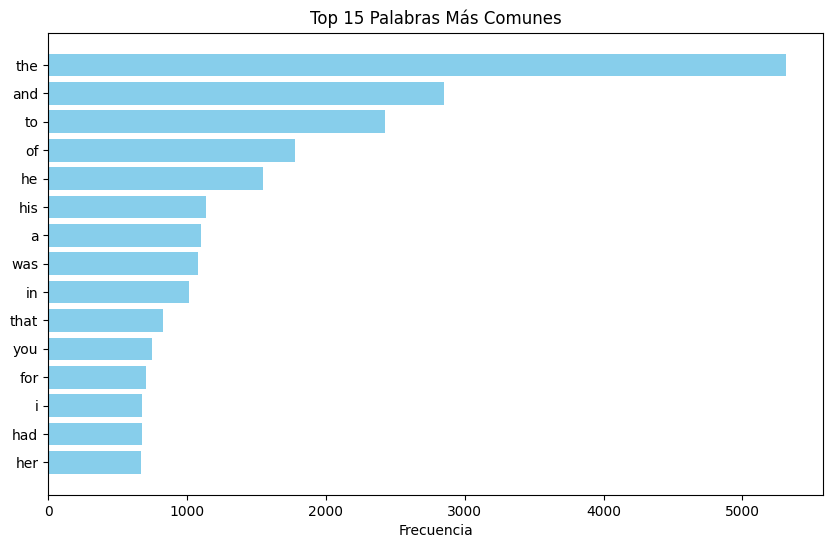

In [29]:
import matplotlib.pyplot as plt

#Mostramos la frecuencia de cada 15 palabras en una grafica de barras
word_counter = Counter(tokens)
top15 = word_counter.most_common(15)
palabras, frecuencias = zip(*top15)

plt.figure(figsize=(10, 6))
plt.barh(palabras, frecuencias, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 15 Palabras Más Comunes')
plt.gca().invert_yaxis()

plt.show()

#2. La ley de Benford

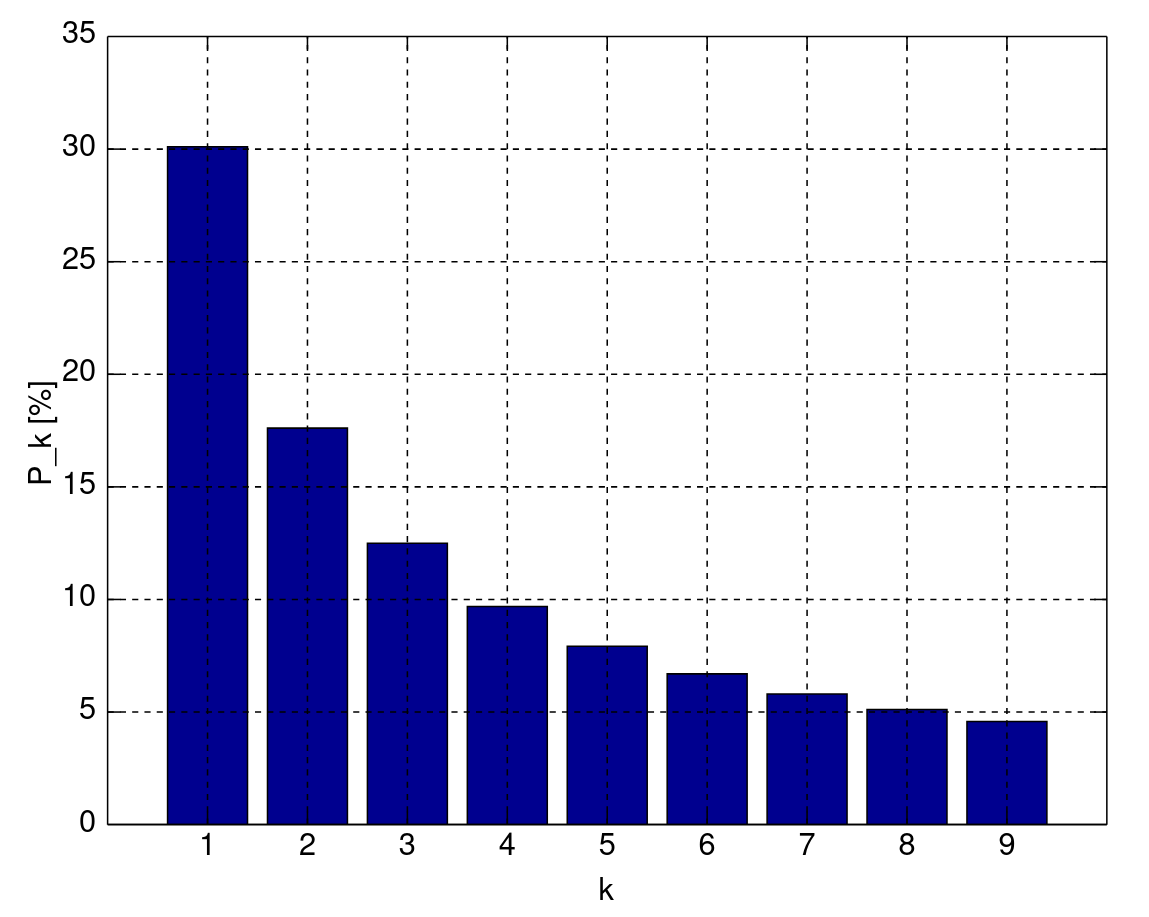

Escoger dos datasets diferentes de los siguientes:

* **Dataset de precios de carros**
        1XCzTrZ5HkiNHI3hjSTthJCOEhI5hZLOq

* **Dataset de riesgo cardiaco**
        1tM5A_UwOjg2EWLqUYW3BmNZ60FaF75Y_

* **Dataset de precios de laptops**
        1whDUO7N6ztt4bEVDakhBQOOLCWtFxo_g

* **Dataset de información demográfica de condados de EUA**
        1VKscxrqu-SijA46jvcQXc-4J9syqqkNe



En cada uno de ellos, realiza los siguiente:

1. Baja el archivo con la instrucción `!gdown` y el id del respectivo dataset.
2. Abre el dataset usando pandas, es un dataframe. Visualiza el dataframe.
3. Escoge una columna que tenga valores *float*, guarda la columna en un arreglo de numpy o lista.
4. Obten el primer dígito de cada valor del arreglo y guarda, **sólo este primer dígito** en otro arreglo. Si prefieres, para hacer esto, puedes usar la función `obtener_leading_digit()` definida más abajo.
5. Haz un conteo de frecuencias de cada dígito del arreglo obtenido en el punto anterior.
6. Grafica, con matplotlib, un gráfico de barras mostrando, de mayor a menor, las frecuencias de cada dígito. El gráfico debe tener como título el dataset y la columna de valores mostrada.
7. Finalmente, concluye y escribe si percibes que tu gráfica se parece a la gráfica de la ley de Benford.

In [ ]:
#Eleji el dataset de riesgo cardiaco y el de informacion demografica de condados de EUA

In [30]:
def obtener_leading_digit(numero):
    return int(str(numero)[0])

In [31]:
#Riesgo Cardiaco
!gdown 1tM5A_UwOjg2EWLqUYW3BmNZ60FaF75Y_

Downloading...
From: https://drive.google.com/uc?id=1tM5A_UwOjg2EWLqUYW3BmNZ60FaF75Y_
To: /content/Heart Attack Risk Assessment Dataset.csv
100% 103k/103k [00:00<00:00, 17.9MB/s]


In [32]:
#Demografia EUA
!gdown 1VKscxrqu-SijA46jvcQXc-4J9syqqkNe

Downloading...
From: https://drive.google.com/uc?id=1VKscxrqu-SijA46jvcQXc-4J9syqqkNe
To: /content/demographic_data.csv
100% 247k/247k [00:00<00:00, 9.09MB/s]


Leer el dataframe con pandas

In [33]:
#Cardiaco
import pandas as pd

pathC = "/content/Heart Attack Risk Assessment Dataset.csv"

data_dfC = pd.read_csv(pathC)
data_dfC

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,65,1,195.336429,149.070951,43.914928,132.878440,86.246414,0,0,0
996,60,1,192.342928,134.357395,53.380714,145.149535,91.069141,0,0,0
997,70,0,174.179319,125.900047,50.406918,133.022878,85.851330,0,0,0
998,48,0,189.715685,152.388737,40.700912,113.527965,86.368294,0,0,0


In [37]:
#Graficamos Cardiaco
import matplotlib.pyplot as plt

columna_float = data_dfC['age'].dropna().astype(float).to_numpy()


In [38]:
def obtener_leading_digit(value):
    """
    Dado un valor numérico, retorna el primer dígito significativo (de 1 a 9).
    """
    s = str(value).lstrip("-").strip()
    for char in s:
        if char.isdigit() and char != '0':
            return int(char)
    return None

leading_digits = [obtener_leading_digit(val) for val in columna_float if obtener_leading_digit(val) is not None]


In [39]:
from collections import Counter

frecuencias = Counter(leading_digits)
print("Frecuencias de los dígitos:", frecuencias)


Frecuencias de los dígitos: Counter({4: 266, 5: 247, 3: 164, 6: 160, 2: 65, 7: 61, 8: 24, 1: 11, 9: 2})


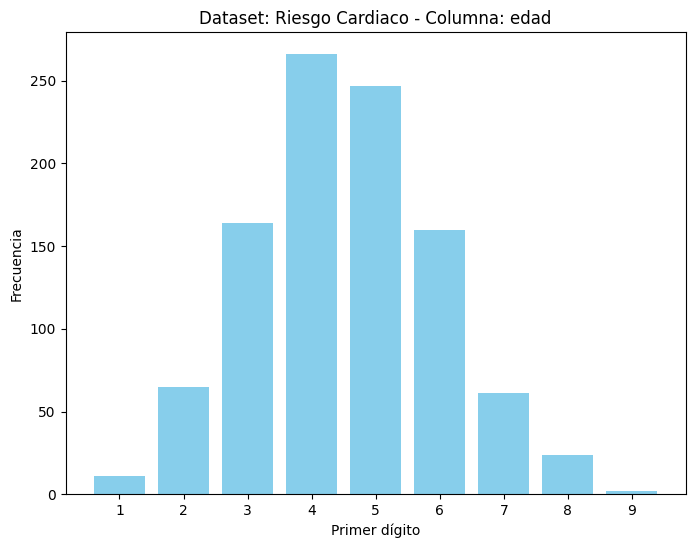

In [40]:
import matplotlib.pyplot as plt

sorted_freq = dict(sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8, 6))
plt.bar(sorted_freq.keys(), sorted_freq.values(), color='skyblue')
plt.xlabel('Primer dígito')
plt.ylabel('Frecuencia')
plt.title('Dataset: Riesgo Cardiaco - Columna: edad')
plt.xticks(list(sorted_freq.keys()))
plt.show()


In [42]:
#Demografico
import pandas as pd

pathD = "/content/demographic_data.csv"

data_dfD = pd.read_csv(pathD)
data_dfD

,County,State,State FIPS Code,County FIPS Code,FIPS,Total Population,Male Population,Female Population,Total Race Responses,White Alone,Black or African American Alone,Hispanic or Latino
0,Autauga County,Alabama,1,1,1001,59285,28669,30616,59285,43616,11829,2188
1,Baldwin County,Alabama,1,3,1003,239945,117316,122629,239945,198721,19144,13393
2,Barbour County,Alabama,1,5,1005,24757,12906,11851,24757,10891,11616,1490
3,Bibb County,Alabama,1,7,1007,22152,11824,10328,22152,16634,4587,744
4,Blount County,Alabama,1,9,1009,59292,29934,29358,59292,53062,747,5962
...,...,...,...,...,...,...,...,...,...,...,...,...
3217,Vega Baja Municipio,Puerto Rico,72,145,72145,54058,25765,28293,54058,13681,2249,53036
3218,Vieques Municipio,Puerto Rico,72,147,72147,8147,4178,3969,8147,1028,222,7803
3219,Villalba Municipio,Puerto Rico,72,149,72149,21778,10510,11268,21778,7552,2219,21700
3220,Yabucoa Municipio,Puerto Rico,72,151,72151,29868,14381,15487,29868,2001,5900,29732


In [44]:
print(data_dfD.columns)

Index(['County', 'State', 'State FIPS Code', 'County FIPS Code', 'FIPS',
       'Total Population', 'Male Population', 'Female Population',
       'Total Race Responses', 'White Alone',
       'Black or African American Alone', 'Hispanic or Latino'],
      dtype='object')


In [45]:
#Graficamos demografico
columna_float = data_dfD['Total Population'].dropna().astype(float).to_numpy()


In [46]:
def obtener_leading_digit(value):
    """
    Dado un valor numérico, retorna el primer dígito significativo (de 1 a 9).
    """
    s = str(value).lstrip("-").strip()
    for char in s:
        if char.isdigit() and char != '0':
            return int(char)
    return None

leading_digits = [obtener_leading_digit(val) for val in columna_float if obtener_leading_digit(val) is not None]


In [47]:
from collections import Counter

frecuencias = Counter(leading_digits)
print("Frecuencias de los dígitos:", frecuencias)


Frecuencias de los dígitos: Counter({1: 972, 2: 602, 3: 404, 4: 295, 5: 252, 6: 203, 8: 172, 7: 170, 9: 152})


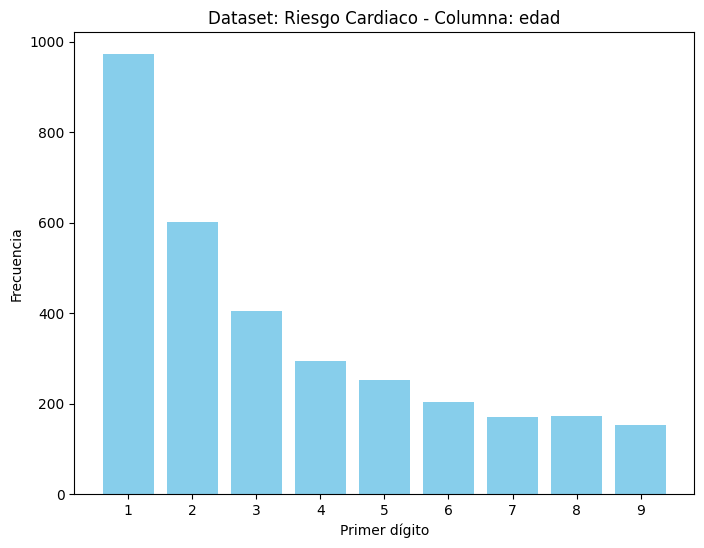

In [48]:
import matplotlib.pyplot as plt

sorted_freq = dict(sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8, 6))
plt.bar(sorted_freq.keys(), sorted_freq.values(), color='skyblue')
plt.xlabel('Primer dígito')
plt.ylabel('Frecuencia')
plt.title('Dataset: Riesgo Cardiaco - Columna: edad')
plt.xticks(list(sorted_freq.keys()))
plt.show()


#3. Valores inventados

In [ ]:
!gdown

In [ ]:
import pandas as pd

data_df = pd.read_csv( ,index_col=0)
data_df

In [ ]:
from collections import Counter

values = data_df.values
values = values.flatten()
values = [int(str(x)[0]) for x in values]
values_counter = Counter(values)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(*zip(*values_counter.most_common()))
plt.show()